# SUBMISSION PROYEK AKHIR FANI FARADILLAH

In [1]:
#import new version tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
#import keras and imagedatagenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Upload rockpaperscissors.zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-08 09:11:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   830KB/s    in 5m 32s  

2021-05-08 09:16:52 (950 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
#extract rockpaperscissors.zip file
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

own_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(own_dir, 'train')
validation_dir = os.path.join(own_dir, 'val')
print(os.listdir(own_dir))

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']


In [6]:
rock_dir = os.path.join(own_dir,'rock')
scissors_dir = os.path.join(own_dir,'scissors')
paper_dir = os.path.join(own_dir,'paper')

In [7]:
print("Rock : ",len(os.listdir(rock_dir)))
print("Scissors : ",len(os.listdir(scissors_dir)))
print("Paper : ",len(os.listdir(paper_dir)))

Rock :  726
Scissors :  750
Paper :  712


In [8]:
#train & test validation split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=32
img_rows,img_cols=120,120
num_classes=3

datagen = ImageDataGenerator(
        rescale=1/255.0,
        zoom_range=0.25,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        validation_split=0.4)

# setup generator
train_generator = datagen.flow_from_directory(
        own_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
        subset='training')
validation_generator = datagen.flow_from_directory(
        own_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
# Create sequential model
from tensorflow.keras.layers import Dropout
img_rows,img_cols=120,120
model = Sequential([Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', 
                           input_shape=(img_rows,img_cols,3)),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    Flatten(),
                    Dropout(rate=0.5),
                    Dense(units=512, activation='relu'),
                    Dense(units=num_classes, activation='softmax')])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0

In [12]:
# Callback to stop training when accuracy reached over 96%
accuracythreshold=96e-2

class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nReached %2.2f%% accuracy, and stop training!" %(accuracythreshold*100))   
          self.model.stop_training = True

In [13]:
# Compile Model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [14]:
# train model
nb_train_samples=1314
nb_validation_samples=874
epochs=55

history=model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=[AccCallback()],
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/55
41/41 [==============================] - 44s 1s/step - loss: 1.2021 - accuracy: 0.3762 - val_loss: 1.2542 - val_accuracy: 0.3958
Epoch 2/55
41/41 [==============================] - 43s 1s/step - loss: 0.7959 - accuracy: 0.6834 - val_loss: 0.3154 - val_accuracy: 0.8912
Epoch 3/55
41/41 [==============================] - 43s 1s/step - loss: 0.5090 - accuracy: 0.8026 - val_loss: 0.3134 - val_accuracy: 0.8854
Epoch 4/55
41/41 [==============================] - 43s 1s/step - loss: 0.3710 - accuracy: 0.8640 - val_loss: 0.2768 - val_accuracy: 0.9201
Epoch 5/55
41/41 [==============================] - 43s 1s/step - loss: 0.2784 - accuracy: 0.9070 - val_loss: 0.2790 - val_accuracy: 0.8924
Epoch 6/55
41/41 [==============================] - 43s 1s/step - loss: 0.2554 - accuracy: 0.9005 - val_loss: 0.1837 - val_accuracy: 0.9398
Epoch 7/55
41/41 [==============================] - 43s 1s/step - loss: 0.2406 - accuracy: 0.9201 - val_loss: 0.2086 - val_accuracy: 0.9248
Epoch 8/55
41/41 [==

<function matplotlib.pyplot.show>

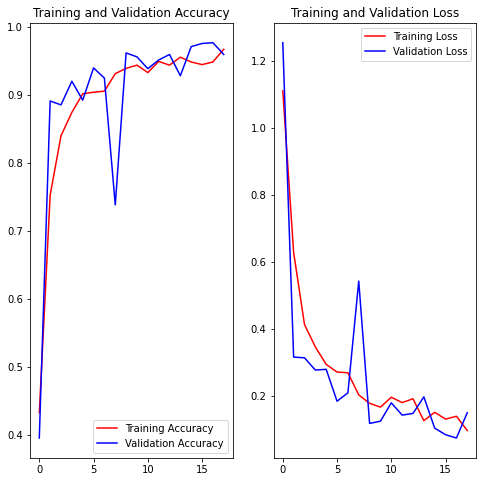

In [15]:
# Visualize training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib.pyplot import figure,subplot,plot,legend,title,show
figure(figsize=(8,8))
subplot(1, 2, 1)
plot(epochs, acc, 'r', label='Training Accuracy')
plot(epochs, val_acc, 'b', label='Validation Accuracy')
legend(loc='lower right')
title('Training and Validation Accuracy')
show

subplot(1, 2, 2)
plot(epochs, loss, 'r', label='Training Loss')
plot(epochs, val_loss, 'b', label='Validation Loss')
legend(loc='upper right')
title('Training and Validation Loss')
show

Saving glvH49YVWOtxdOyh.png to glvH49YVWOtxdOyh.png
[2]
Scissors


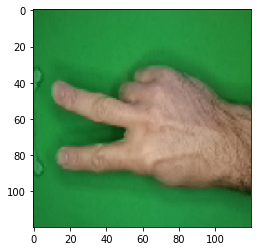

In [16]:
# new prediction model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  my_img = np.argmax(classes, axis=1)
  print(my_img)

  if my_img==0:
    print('Paper')
  elif my_img==1:
    print('Rock')
  elif my_img==2:
    print('Scissors')
  